# Анализ рынка недвижимости

##  Задачи:
1. **Предобработка данных:**

   - Обработка пропущенных значений.
   - Удаление дубликатов.
   - Преобразование типов данных.
   - Работа с аномальными значениями.
2. **Посчитать цену за квадратный метр:**
   - Рассчитайте стоимость за квадратный метр, поделив цену на общую площадь каждой квартиры.

3. **Выделить данные из города Санкт-Петербург:**
   - Отфильтруйте данные, оставив только те, которые относятся к городу Санкт-Петербург.

4. **Построить гистограммы и ответить на вопросы:**
   - Сколько примерно дней занимает продажа объявлений в Санкт-Петербурге?
   - Какое среднее количество комнат в квартирах Санкт-Петербурга?
   - Как распределена высота потолков в Санкт-Петербурге?

5. **Построить гистограммы по второму по дороговизне городу:**
   - Определите второй по дороговизне город и постройте гистограммы для него.

6. **Определить, в каком из городов квартиры продаются быстрее и где наименьшая средняя продолжительность продажи:**
   - Сравните средние значения времени продажи в обоих городах.

7. **Посмотреть количество комнат по квартирам, расположенным на последнем этаже:**
   - Проанализируйте количество комнат в квартирах, расположенных на последнем этаже.

8. **Посчитать среднюю цену квартир, расположенных на последнем этаже:**
   - Рассчитайте среднюю стоимость квартир, находящихся на последнем этаже.

9. **Сформулировать предложение, в каком городе лучше всего брать квартиру для последующей перепродажи и сколько комнат выбрать, чтобы произвести продажу быстрее:**
   - Определите рекомендации по выбору города и количеству комнат на основе проведенного анализа данных.

## Предоставленные данные
1. `last_price` - Цена недвижимости, выраженная в российских рублях.

2. `total_area` - Полная площадь недвижимости в квадратных метрах.

3. `first_day_exposition` - Дата и время, когда объявление было первоначально размещено.

4. `rooms` - Количество комнат в недвижимости.

5. `ceiling_height` - Высота потолков в недвижимости, выраженная в метрах.

6. `floors_total` - Общее количество этажей в здании.

7. `living_area` - Жилая площадь в недвижимости в квадратных метрах.

8. `floor` - Этаж, на котором расположена недвижимость.

9. `is_apartment` - Флаг, указывающий, является ли недвижимость апартаментами (True или False).

10. `studio` - Флаг, указывающий, является ли недвижимость студией (True или False).

11. `open_plan` - Флаг, указывающий, является ли недвижимость с открытой планировкой (True или False).

12. `kitchen_area` - Площадь кухни в недвижимости в квадратных метрах.

13. `balcony` - Количество балконов.

14. `locality_name` - Название населенного пункта, где находится недвижимость.

15. `airports_nearest` - Расстояние до ближайшего аэропорта в метрах.

16. `cityCenters_nearest` - Расстояние до центра города в метрах.

17. `parks_around3000` - Количество парков в радиусе 3 км от недвижимости.

18. `parks_nearest` - Расстояние до ближайшего парка в метрах.

19. `ponds_around3000` - Количество водоемов (прудов) в радиусе 3 км от недвижимости.

20. `ponds_nearest` - Расстояние до ближайшего водоема (пруда) в метрах.

21. `days_exposition` - Количество дней, в течение которых недвижимость была размещена на продажу до ее продажи или снятия с продажи.

In [1]:
# загружаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv('real_estate_data.csv', sep = '\t')

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
print(df['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

###  1. **Предобработка данных:**
Проведите процесс очистки данных, чтобы удалить дубликаты, нулевые значения и любые аномалии, которые могут повлиять на точность анализа.

In [6]:
df = df.drop_duplicates() 

In [7]:
df[df.duplicated()] #дубликатов не обнаружено

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Length: 23699, dtype: bool

In [9]:
#Преобразование типов данных
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

In [10]:
#ЗАПОЛНЕНИЕ ПУСТЫХ ЗНАЧЕНИЙ 

In [11]:
df['balcony'] = df['balcony'].fillna(0)

In [12]:
df['airports_nearest'] = df['airports_nearest'].fillna(0)

In [13]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(0)

In [14]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)

In [15]:
df['parks_nearest'] = df['parks_nearest'].fillna(0)

In [16]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [17]:
df['ponds_nearest'] = df['ponds_nearest'].fillna(0)

In [18]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [19]:
df['days_exposition'] = df['days_exposition'].fillna(0)

In [20]:
df['floors_total'] = df['floors_total'].fillna(0)

In [21]:
df['locality_name'] = df['locality_name'].fillna('Неизвестно')

In [22]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].mean())

In [23]:
df['living_area'] = df['living_area'].fillna(df['living_area'].mean())

In [24]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

#### Вывод после предварительной обработки данных по недвижимости
В ходе предварительной обработки данных было проведено несколько важных шагов, направленных на обеспечение качественного анализа данных о недвижимости. Ниже приведены ключевые результаты и принятые решения:

- Отсутствие дубликатов: Первоначальная проверка не выявила дубликаты в наборе данных.
- Преобразование столбца "first_day_exposition" в формат даты: Столбец "first_day_exposition" был преобразован в формат даты для более удобного анализа.
- Заполнение пропущенных значений "ceiling_height": Пропущенные значения в столбце "ceiling_height" были заполнены медианным значением этого столбца. Этот шаг позволил избежать утери информации и обеспечил более полные данные.
- Заполнение пропущенных значений в нескольких столбцах: В столбцах "floors_total," "balcony," "airports_nearest," "cityCenters_nearest," "parks_around3000," "parks_nearest," "ponds_around3000," "ponds_nearest," и "days_exposition" пропущенные значения были заполнены нулем. Это решение обусловлено тем, что отсутствие данных, вероятно, связано с незнанием информации со стороны клиентов, которые, возможно, редко бывают в данной области и не имеют точных данных о близлежащей инфраструктуре. Заполнение нулевыми значениями поможет учесть это исключение в анализе.
- Заполнение пропущенных значений "is_apartment": Пропущенные значения в столбце "is_apartment" были заполнены значением "False," что представляется разумным предположением, учитывая, что большинство недвижимости не является апартаментами.
- Заполнение пропущенных значений "living_area" и "kitchen_area": Пропущенные значения в столбцах "living_area" и "kitchen_area" были заполнены средними значениями этих столбцов. Это помогает улучшить точность данных, сохраняя средние пропорции.
- Маркировка неизвестных местоположений: Пропущенные значения в столбце "locality_name" были заменены значением "Неизвестно" для обозначения отсутствия информации о местоположении объекта недвижимости. 

#### Посчитайте количество объявлений по областям

In [25]:
df.groupby('locality_name').agg({'total_images':'count'}).reset_index().sort_values(by = 'total_images', ascending = False)

,locality_name,total_images
34,Санкт-Петербург,15721
292,посёлок Мурино,522
327,посёлок Шушары,440
3,Всеволожск,398
33,Пушкин,369
...,...,...
190,поселок Каложицы,1
192,поселок Кирпичное,1
195,поселок Коммунары,1
196,поселок Коробицыно,1


 #### Посчитайте суммарную стоимость недвижимостей по областям

In [26]:
#df['last_price'] = df['last_price'] / 1000000 # делим на млн для читабельности

In [27]:
df.groupby('locality_name').agg({'last_price':'sum'}).reset_index().sort_values(by = 'last_price', ascending = False)

,locality_name,last_price
34,Санкт-Петербург,1.267507e+11
33,Пушкин,2.387074e+09
292,посёлок Мурино,1.916810e+09
327,посёлок Шушары,1.807556e+09
3,Всеволожск,1.508049e+09
...,...,...
250,поселок городского типа Кондратьево,7.500000e+05
239,поселок Тёсово-4,7.500000e+05
244,поселок Цвылёво,6.500000e+05
157,деревня Чудской Бор,5.000000e+05


 #### Посчитайте среднее количество комнат, сгруппированных по областям

In [28]:
df.groupby('locality_name').agg({'rooms':'mean'}).reset_index().sort_values(by = 'rooms', ascending = False)

,locality_name,rooms
156,деревня Хязельки,5.0
115,деревня Нижняя,4.0
170,поселок Возрождение,4.0
279,посёлок Дзержинского,4.0
275,посёлок Возрождение,4.0
...,...,...
260,поселок городского типа Рябово,1.0
139,деревня Старая Пустошь,1.0
140,деревня Старое Хинколово,1.0
267,поселок станции Корнево,0.0


 #### Посчитайте среднюю сумму стоимости квартиры сгруппированных по областям

In [29]:
df.groupby('locality_name').agg({'last_price':'mean'}).reset_index().sort_values(by = 'last_price', ascending = False)

,locality_name,last_price
310,посёлок Репино,1.216685e+07
156,деревня Хязельки,1.100000e+07
68,деревня Бор,1.039760e+07
270,посёлок Александровская,8.725000e+06
34,Санкт-Петербург,8.062507e+06
...,...,...
350,посёлок станции Свирь,5.750000e+05
231,поселок Совхозный,5.175000e+05
157,деревня Чудской Бор,5.000000e+05
141,деревня Старополье,4.600000e+05


#### Посчитайте среднюю высоту потолков сгруппированных по областям

In [30]:
df.groupby('locality_name').agg({'ceiling_height':'mean'}).reset_index().sort_values(by = 'ceiling_height', ascending = False)

,locality_name,ceiling_height
115,деревня Нижняя,27.000000
111,деревня Мины,14.825000
208,поселок Новый Свет,7.130000
44,городской поселок Большая Ижора,4.159375
311,посёлок Ропша,3.200000
...,...,...
149,деревня Тойворово,2.500000
213,поселок Перово,2.500000
156,деревня Хязельки,2.500000
5,Высоцк,2.487500


#### Посчитайте среднюю стоимость квартир сгруппированных по количеству комнат

In [31]:
df.groupby('rooms').agg({'last_price':'mean'}).reset_index().sort_values(by = 'last_price', ascending = False)

,rooms,last_price
12,12,4.200000e+08
14,15,6.500000e+07
7,7,5.147007e+07
8,8,5.022417e+07
9,9,3.415236e+07
16,19,3.225000e+07
6,6,3.170975e+07
15,16,2.850000e+07
13,14,2.682950e+07
10,10,2.616667e+07


 #### Посчитайте среднюю продолжительность продажи сгруппированных по областям

In [32]:
df.groupby('locality_name').agg({'days_exposition':'mean'}).reset_index().sort_values(by = 'days_exposition', ascending = False)

,locality_name,days_exposition
225,поселок Севастьяново,1069.0
196,поселок Коробицыно,750.0
287,посёлок Лисий Нос,717.5
339,посёлок городского типа Рябово,647.0
64,деревня Большая Пустомержа,627.0
...,...,...
92,деревня Котлы,0.0
91,деревня Коркино,0.0
151,деревня Торошковичи,0.0
157,деревня Чудской Бор,0.0


  #### Оставьте только те данные, в области которых, количество объявлений которых больше 50 *

In [33]:
cities = df.groupby('locality_name').agg({'total_images':'count'}).reset_index() # Считаем количество объявлений по областям

In [34]:
cities = cities.query('total_images > 50') # Оставляем только те области в которых более 50 объявлений

In [35]:
cities.columns = ['locality_name', 'num_posts']

In [36]:
df_1 = pd.merge(cities, df, on = 'locality_name', how = 'left') # Добавляем отдельную переменную в которой хранятся данные по недвижимости, в городах, где более 50 объявлений

### 2. Посчитать цену за квадратный метр
- Для того чтобы посчитать цену за квадратный метр (цену за м²) недвижимости, вам нужно разделить столбец с ценой (например, 'last_price') на столбец с общей площадью (например, 'total_area'). Это даст вам цену за каждый квадратный метр.
 


In [37]:
df['price_per_square_meter'] = df['last_price'] / df['total_area']

In [38]:
df['price_per_square_meter']

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: price_per_square_meter, Length: 23699, dtype: float64

### 3.  Выделить данные из города Санкт-Петербург

In [39]:
spb_data = df[df['locality_name'] == 'Санкт-Петербург']

In [40]:
spb_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,120370.370370
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,34.457852,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,34.457852,22,False,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,0.0,0.0,110544.692737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.300000,4,False,...,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0,100566.572238
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5.0,31.000000,2,False,...,0.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,0.0,15.0,105769.230769
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.300000,7,False,...,1.0,Санкт-Петербург,19424.0,4489.0,0.0,0.0,1.0,806.0,519.0,129903.978052
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,0.0,72490.845228


### 4.  Построить гистограммы и ответить на вопросы:
- Сколько примерно дней занимает продажа объявлений в Санкт-Петербурге?
- Сколько обычно комнат в квартирах Санкт-Петербурга (Часто встречающиеся значения)
- Распределение высоты потолков в Санкт-Петербурге

#### Для определения сколько дней примерно занимает продажа объявлений в Санкт-Петербурге, вам следует построить гистограмму распределения продолжительности продаж (столбец days_exposition) в этом городе. Далее, вы можете анализировать пик этого распределения.

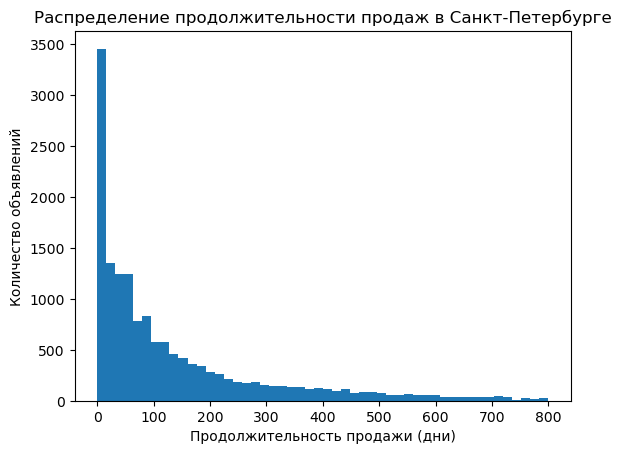

In [41]:
# Строим гистограмму "Распределение продолжительности продаж в Санкт-Петербурге"
plt.hist(spb_data['days_exposition'], bins=50, range=(0, 800))
plt.xlabel('Продолжительность продажи (дни)')
plt.ylabel('Количество объявлений')
plt.title('Распределение продолжительности продаж в Санкт-Петербурге')
plt.show()


In [42]:
spb_data['days_exposition'].mean()

158.57260988486738

##### Вывод:
- Из гистограммы распределения продолжительности продаж в Санкт-Петербурге видно, что большинство объявлений продаются в течение первых 100-150 дней. Пик продаж приходится на этот временной интервал.


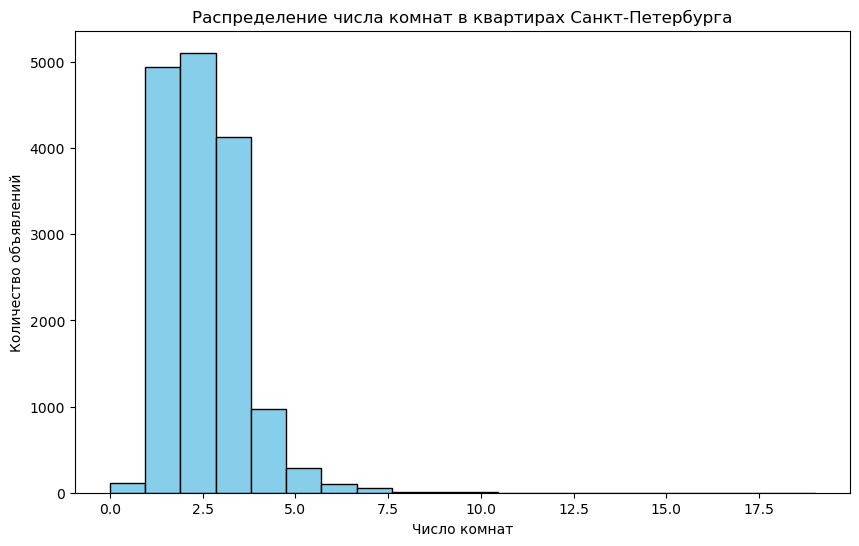

In [43]:
# Построение гистограммы "Распределение числа комнат в квартирах Санкт-Петербурга"
plt.figure(figsize=(10, 6))
plt.hist(spb_data['rooms'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение числа комнат в квартирах Санкт-Петербурга')
plt.xlabel('Число комнат')
plt.ylabel('Количество объявлений')
plt.show()


In [44]:
spb_data['rooms'].mean()

2.17161758157878

#### Вывод:
Наиболее распространенными квартирами в Санкт-Петербурге являются однокомнатные, двухкомнатные и трехкомнатные.

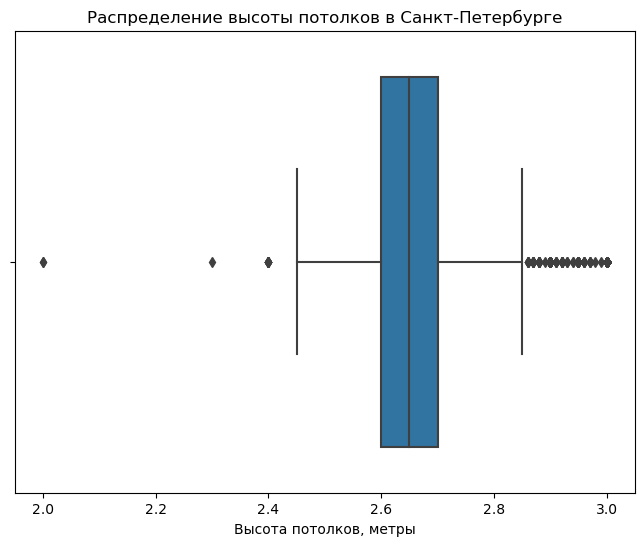

In [45]:
spb_data_filtered = df[(df['locality_name'] == 'Санкт-Петербург') & (df['ceiling_height'] >= 2) & (df['ceiling_height'] <= 3)]

# Построение box plot для высоты потолков
plt.figure(figsize=(8, 6))
sns.boxplot(x=spb_data_filtered['ceiling_height'])
plt.title('Распределение высоты потолков в Санкт-Петербурге')
plt.xlabel('Высота потолков, метры')
plt.show()


In [46]:
spb_data['ceiling_height'].mean()

2.748790153298136

#### Вывод:
В случае распределения высоты потолков в Санкт-Петербурге, обычно потолки в квартирах колеблются от 2.4 до 3 метров. Самое часто встречающееся значение (мода) приблизительно в районе 2.7 метра. Это объясняется тем, что стандартной высотой потолков в новостройках обычно является 2.7 метра, и это наиболее популярный вариант среди жильцов Санкт-Петербурга.

### 5.  Построить гистограммы по второму по дороговизне городу

In [47]:
df_1

,locality_name,num_posts,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,...,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,Волхов,111,20,2100000.0,60.0,2019-04-06,2,2.50,5.0,31.5,...,False,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Волхов,111,20,1449900.0,43.8,2019-02-21,2,2.70,4.0,29.0,...,False,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Волхов,111,11,2600000.0,86.3,2016-05-24,4,3.00,3.0,63.0,...,False,7.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Волхов,111,10,1010000.0,32.2,2017-06-01,1,2.50,4.0,17.5,...,False,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,224.0
4,Волхов,111,12,2120000.0,58.0,2017-12-13,2,2.50,5.0,45.0,...,False,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21631,посёлок Шушары,440,8,3490000.0,40.6,2016-06-21,1,2.56,10.0,18.7,...,False,10.8,2.0,12416.0,18203.0,0.0,0.0,0.0,0.0,26.0
21632,посёлок Шушары,440,20,2500000.0,31.7,2018-08-14,1,2.70,6.0,14.5,...,False,10.1,0.0,18012.0,23689.0,0.0,0.0,1.0,630.0,29.0
21633,посёлок Шушары,440,2,3150000.0,41.0,2018-10-25,1,2.65,20.0,18.6,...,False,8.8,0.0,12526.0,18312.0,0.0,0.0,0.0,0.0,43.0
21634,посёлок Шушары,440,12,4250000.0,64.9,2018-11-14,2,2.80,5.0,39.0,...,False,10.0,2.0,18041.0,30047.0,0.0,0.0,1.0,559.0,124.0


In [48]:
df_filtered = df_1[df_1['locality_name'] != 'Санкт-Петербург']

In [49]:
data1 = df_filtered.groupby('locality_name').agg({'last_price': 'mean'}).reset_index().sort_values(by = 'last_price', ascending = False)

In [50]:
data1

,locality_name,last_price
18,Пушкин,6.469036e+06
20,Сестрорецк,6.341722e+06
11,Кудрово,4.573916e+06
32,посёлок Парголово,4.488075e+06
16,Петергоф,4.423841e+06
26,деревня Кудрово,4.234158e+06
10,Кронштадт,4.132365e+06
33,посёлок Шушары,4.108082e+06
7,Колпино,3.964021e+06
22,Сосновый Бор,3.908129e+06


#### Постройте круговую диаграмму по сумме цен на недвижимость, разбитых по городам

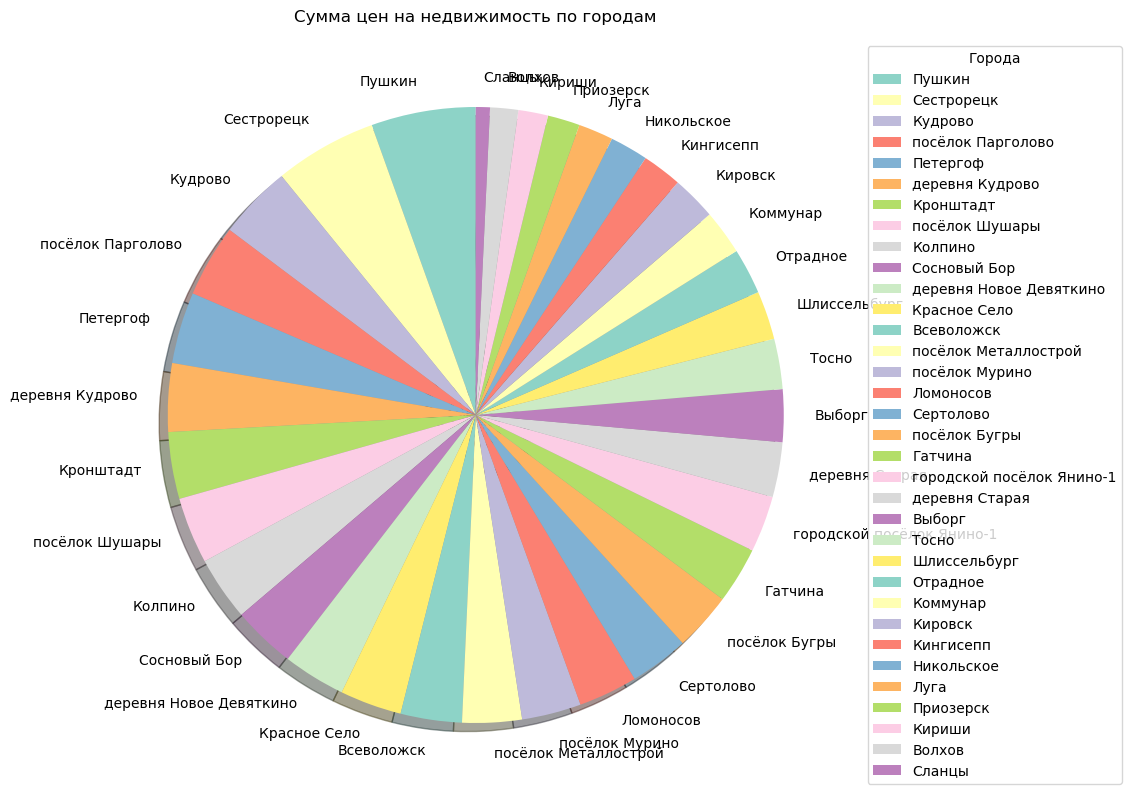

In [51]:
# Используем схему цветов из seaborn
colors = sns.color_palette("Set3", len(df))

# Создание круговой диаграммы
plt.figure(figsize=(10, 10))
plt.pie(data1['last_price'], labels=data1['locality_name'], colors=colors, startangle=90, shadow=True)

# Отображение легенды
plt.legend(data1['locality_name'], title="Города", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Сумма цен на недвижимость по городам')


# Отображение круговой диаграммы
plt.show()

#### Вывод:
Исходя из данных о средних ценах на недвижимость в разных городах, можно сделать вывод, что городом, идущим после Санкт-Петербурга по дороговизне недвижимости, является город Пушкин. Средняя цена недвижимости в Пушкине (6.469 миллиона) выше, чем в остальных рассмотренных городах, за исключением Санкт-Петербурга (8.062 миллиона).

###  Что вы можете сказать по данным из Санкт Петербурга и Пушкина?
Постройте гистограммы и ответьте на вопросы:
- Сколько примерно дней занимает продажа объявлений в Пушкине?
- Сколько обычно комнат в квартирах Пушкина (Часто встречающиеся значения)
- Распределение высоты потолков в Пушкине?


In [52]:
pushkin_data = df[df['locality_name'] == 'Пушкин']

In [53]:
pushkin_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter
14,1,4400000.0,36.0,2016-06-23,1,2.65,6.0,17.0,1,False,...,0.0,Пушкин,20782.0,30759.0,0.0,0.0,1.0,96.0,203.0,122222.222222
28,8,4170000.0,44.0,2017-12-13,1,2.90,6.0,20.8,1,False,...,1.0,Пушкин,18557.0,30710.0,0.0,0.0,1.0,118.0,74.0,94772.727273
50,1,4500000.0,48.2,2017-11-13,1,2.70,5.0,25.4,4,False,...,1.0,Пушкин,19841.0,30183.0,1.0,531.0,3.0,330.0,152.0,93360.995851
109,2,7497600.0,62.5,2015-12-08,2,2.65,5.0,35.5,5,False,...,0.0,Пушкин,14517.0,26670.0,1.0,517.0,0.0,0.0,1048.0,119961.600000
126,10,4050000.0,51.0,2019-04-23,2,2.65,5.0,30.5,1,False,...,0.0,Пушкин,17974.0,32546.0,1.0,15.0,1.0,659.0,0.0,79411.764706


#### По этой гистограмме можно анализировать продолжительность продажи в городе Пушкин и сравнивать ее с продажами в Санкт-Петербурге.

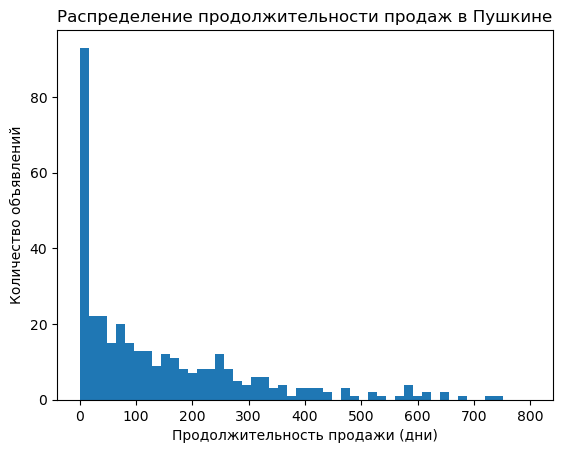

In [54]:
# Фильтруем только объявления из Пушкина
pushkin_data = df[df['locality_name'] == 'Пушкин']

# Строим гистограмму
plt.hist(pushkin_data['days_exposition'], bins=50, range=(0, 800))
plt.xlabel('Продолжительность продажи (дни)')
plt.ylabel('Количество объявлений')
plt.title('Распределение продолжительности продаж в Пушкине')


plt.show()


In [55]:
pushkin_data['days_exposition'].mean()

174.3658536585366

#### Вывод:

Распределения продолжительности продаж в Санкт-Петербурге и Пушкине можно заметить, что недвижимости продаются достаточно быстро. Это указывает на схожие рыночные условия в этих двух городах.

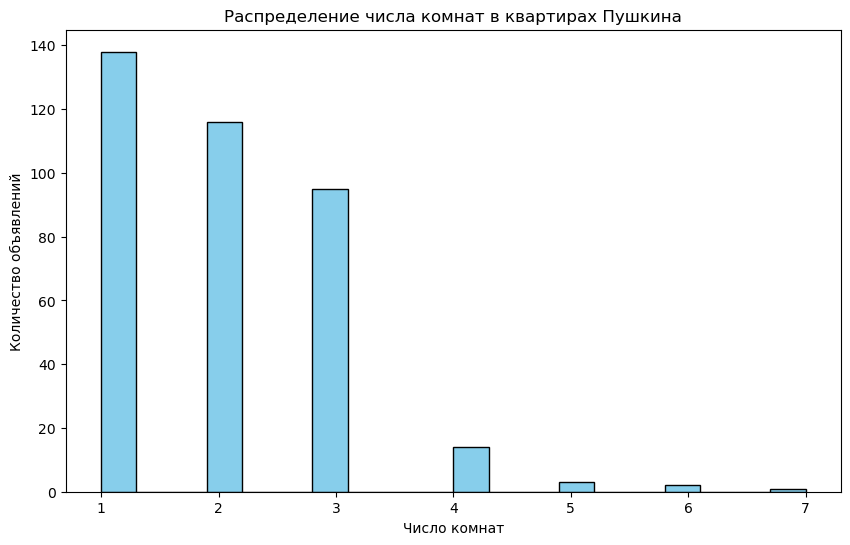

In [56]:
# Фильтрация данных для Пушкина
pushkin_data = df[df['locality_name'] == 'Пушкин']

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(pushkin_data['rooms'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение числа комнат в квартирах Пушкина')
plt.xlabel('Число комнат')
plt.ylabel('Количество объявлений')

plt.show()

In [57]:
pushkin_data['rooms'].mean()

2.0189701897018972

#### Вывод:
В Пушкине представлены преимущественно одно- и двухкомнатные квартиры. 

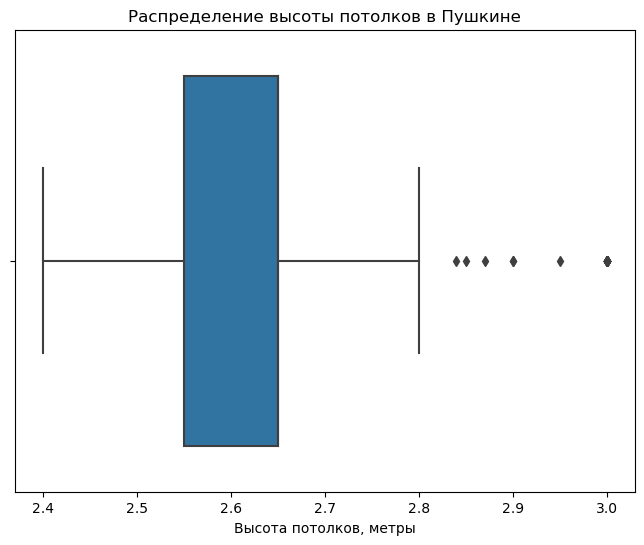

In [58]:
pushkin_data_filtered = df[(df['locality_name'] == 'Пушкин') & (df['ceiling_height'] >= 2) & (df['ceiling_height'] <= 3)]

# Построение box plot для высоты потолков
plt.figure(figsize=(8, 6))
sns.boxplot(x=pushkin_data_filtered['ceiling_height'])
plt.title('Распределение высоты потолков в Пушкине')
plt.xlabel('Высота потолков, метры')
plt.show()

In [59]:
pushkin_data['ceiling_height'].mean()

2.685934959349593

#### Вывод:
    Самое часто встречающееся значение (мода) приблизительно в районе 2.6 - 2.7 метра.

### 6.  Определить, в каком из городов квартиры продаются быстрее и где наименьшая средняя продолжительность продажи

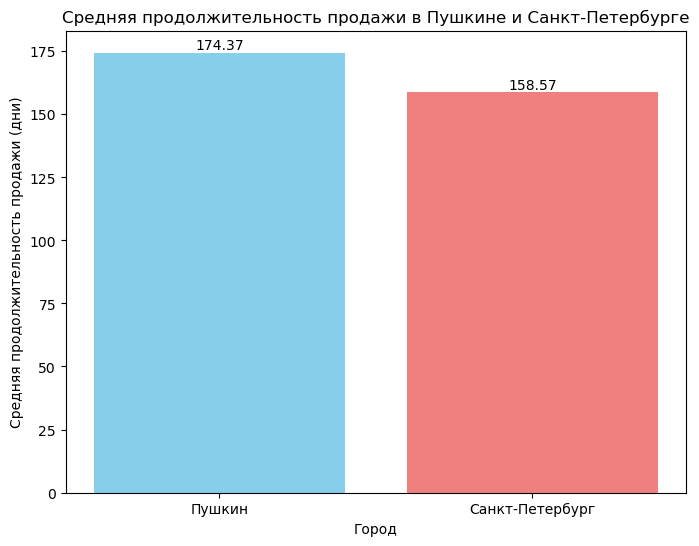

In [60]:
# Средняя продолжительность продажи в Пушкине и Санкт-Петербурге
average_days_pushkin = pushkin_data['days_exposition'].mean()
average_days_spb = spb_data['days_exposition'].mean()

# Создание графика
plt.figure(figsize=(8, 6))
plt.bar(['Пушкин', 'Санкт-Петербург'], [average_days_pushkin, average_days_spb], color=['skyblue', 'lightcoral'])
plt.title('Средняя продолжительность продажи в Пушкине и Санкт-Петербурге')
plt.xlabel('Город')
plt.ylabel('Средняя продолжительность продажи (дни)')
for i, v in enumerate([average_days_pushkin, average_days_spb]):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
plt.show()


#### Вывод:
Исходя из полученных данных, в Пушкине средняя продолжительность продажи недвижимости составляет 174,37 дня, в то время как в Санкт-Петербурге эта цифра равна 158,57 дня.

Это означает, что в Санкт-Петербурге недвижимость в среднем продается немного быстрее, чем в Пушкине, хотя разница не слишком велика. Эти данные могут быть полезными при принятии решения о том, где приобретать недвижимость, учитывая среднее время продажи.

### Средняя продолжительность продажи по городам

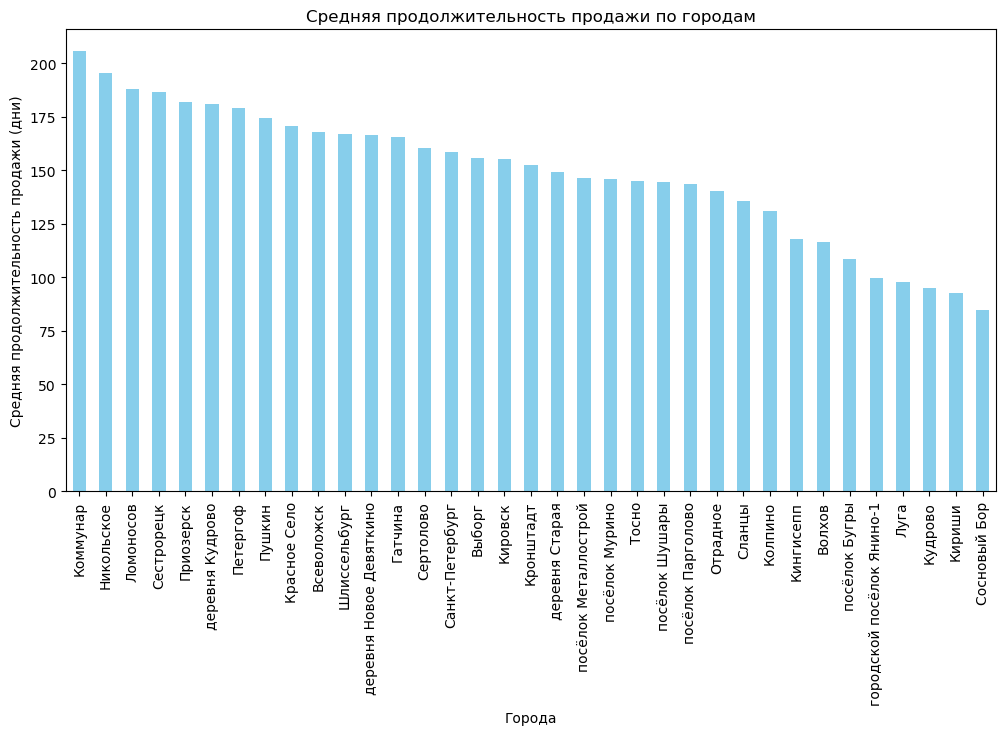

In [61]:
# Группировка данных по городам и вычисление средней продолжительности продажи
avg_days_by_locality = df_1.groupby('locality_name')['days_exposition'].mean().sort_values(ascending=False)

# Построение графика
plt.figure(figsize=(12, 6))
avg_days_by_locality.plot(kind='bar', color='skyblue')
plt.xlabel('Города')
plt.ylabel('Средняя продолжительность продажи (дни)')
plt.title('Средняя продолжительность продажи по городам')
plt.xticks(rotation=90)
plt.show()


### 7.  Посмотреть количество комнат по квартирам, расположенным на последнем этаже

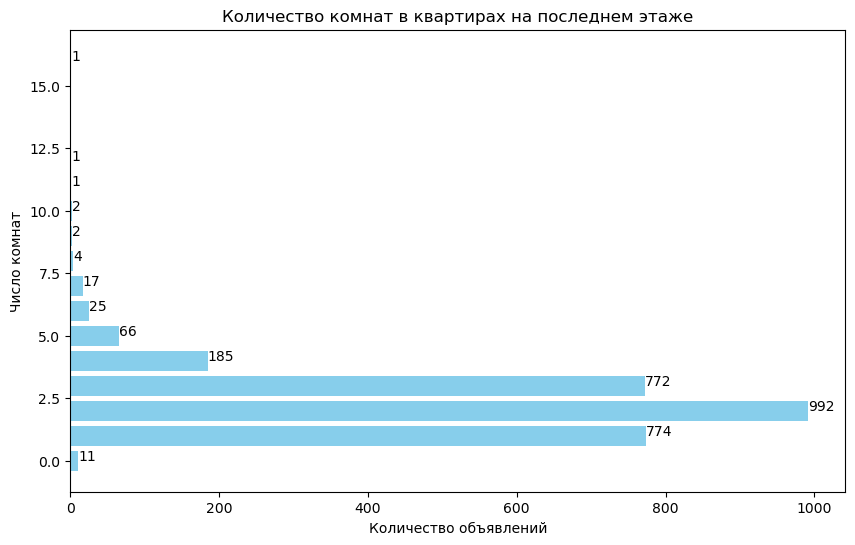

In [62]:
# Фильтрация данных для квартир на последнем этаже
last_floor_apartments = df_1[df_1['floor'] == df_1['floors_total']]

# Группировка данных по числу комнат и подсчёт количества объявлений
room_counts = last_floor_apartments['rooms'].value_counts().sort_index()

# Построение графика
plt.figure(figsize=(10, 6))
plt.barh(room_counts.index, room_counts.values, color='skyblue')
plt.title('Количество комнат в квартирах на последнем этаже')
plt.xlabel('Количество объявлений')
plt.ylabel('Число комнат')
for index, value in zip(room_counts.index, room_counts.values):
    plt.text(value, index, str(value))
plt.show()


#### Вывод:
Самым распространенным вариантом среди квартир на последнем этаже являются двухкомнатные квартиры (992 объявления), за ними идут однокомнатные (774 объявления) и трехкомнатные (772 объявления) квартиры.

### 8. Посчитать среднюю цену квартир, расположенных на последнем этаже


In [63]:
# Фильтрация данных для квартир на последнем этаже
last_floor_apartments = df_1[df_1['floor'] == df_1['floors_total']]

# Расчет средней цены
average_price_last_floor = last_floor_apartments['last_price'].mean()

print("Средняя цена квартир на последнем этаже:", average_price_last_floor)


Средняя цена квартир на последнем этаже: 8178269.531370487


#### Средняя цена квартир на последнем этаже в Санкт-Петербурге

In [64]:
# Фильтрация данных для квартир в Санкт-Петербурге на последнем этаже
spb_last_floor_apartments = spb_data[spb_data['floor'] == spb_data['floors_total']]

# Расчет средней цены
average_price_last_floor_spb = spb_last_floor_apartments['last_price'].mean()

print("Средняя цена квартир на последнем этаже в Санкт-Петербурге:", average_price_last_floor_spb)


Средняя цена квартир на последнем этаже в Санкт-Петербурге: 10347520.071953781


#### Средняя цена квартир в Санкт-Петербурге

In [65]:
average_price_spb = df[df['locality_name'] == 'Санкт-Петербург']['last_price'].mean()
print("Средняя цена квартир в Санкт-Петербурге:", average_price_spb, "рублей")


Средняя цена квартир в Санкт-Петербурге: 8062507.068634311 рублей


#### Средняя цена квартир в Санкт-Петербурге (не на последнем этаже)

In [66]:
average_price_spb = df[(df['locality_name'] == 'Санкт-Петербург') & (df['floor'] < df['floors_total'])]['last_price'].mean()
print("Средняя цена квартир в Санкт-Петербурге (не на последнем этаже):", average_price_spb, "рублей")


Средняя цена квартир в Санкт-Петербурге (не на последнем этаже): 7748745.047064814 рублей


#### Средняя цена квартир на последнем этаже в Пушкине

In [67]:
# Фильтрация данных для квартир в Пушкине на последнем этаже
pushkin_last_floor_apartments = pushkin_data[pushkin_data['floor'] == pushkin_data['floors_total']]

# Расчет средней цены
average_price_last_floor_pushkin = pushkin_last_floor_apartments['last_price'].mean()

print("Средняя цена квартир на последнем этаже в Пушкине:", average_price_last_floor_pushkin)


Средняя цена квартир на последнем этаже в Пушкине: 7270025.105882353


#### Средняя цена квартир в Пушкине

In [68]:
average_price_pushkin = df[df['locality_name'] == 'Пушкин']['last_price'].mean()
print("Средняя цена квартир в Пушкине:", average_price_pushkin, "рублей")


Средняя цена квартир в Пушкине: 6469035.945799458 рублей


#### Средняя цена квартир в Пушкине (не на последнем этаже)

In [69]:
average_price_pushkin = df[(df['locality_name'] == 'Пушкин') & (df['floor'] < df['floors_total'])]['last_price'].mean()
print("Средняя цена квартир в Пушкине (не на последнем этаже):", average_price_pushkin, "рублей")


Средняя цена квартир в Пушкине (не на последнем этаже): 6229303.274647887 рублей


#### Вывод:
- Средняя цена квартир на последнем этаже в Санкт-Петербурге выше, чем средняя цена квартир в Пушкине на последнем этаже (в Санкт-Петербурге составляет примерно 10.35 миллионов рублей, в то время как в Пушкине средняя цена квартир на последнем этаже равна примерно 7.27 миллионов рублей.).
- Средняя цена квартир в Санкт-Петербурге (не на последнем этаже) также выше, чем средняя цена квартир в Пушкине (не на последнем этаже).
- Средняя цена квартир в Пушкине (не на последнем этаже) составляет 6.29 млн рублей, что делает этот вариант наиболее оптимальным для покупателей, ориентированных на доступные цены на недвижимость.
Эти данные позволяют сделать вывод, что при покупке квартиры в Пушкине можно получить более выгодное предложение с более низкой ценой по сравнению с Санкт-Петербургом.


### В результате проведенной работы были получены следующие выводы:

- Средняя стоимость квартир в Санкт-Петербурге выше, чем в Пушкине, что делает столицу более дорогим местом для покупки недвижимости.

- Наиболее популярными квартирами в обоих городах являются 1-3 комнатные квартиры, что может свидетельствовать о популярности такого жилья среди покупателей.

- В среднем, продажи недвижимости в Санкт-Петербурге занимают немного меньше времени, чем в Пушкине. Возможно, это связано с более высокой активностью на рынке недвижимости в столице. Средняя продолжительность продажи недвижимости в Санкт-Петербурге составляет 158,57 дня, а в Пушкине - 174,37 дня. Несмотря на небольшую разницу, квартиры в Санкт-Петербурге продажаются в среднем немного быстрее.
- Средняя цена квартир в Пушкине (не на последнем этаже) составляет 6.29 млн рублей, что делает этот вариант наиболее оптимальным для покупателей, ориентированных на доступные цены на недвижимость. 


- График распределения цен на недвижимость в Пушкине показывает, что большинство квартир имеют более низкую стоимость, чем в Санкт-Петербурге. В столице ценовой диапазон более разнообразен.

- Пушкин предлагает более доступные цены на недвижимость, но продажи обычно занимают немного больше времени. Санкт-Петербург, с другой стороны, предлагает более широкий спектр цен и продажи немного быстрее.




### 9. Сформулировать предложение, в каком городе лучше всего брать квартиру для последующей перепродажи и сколько комнат выбрать, чтобы произвести продажу быстрее

#### В ходе анализа данных о продажах недвижимости в Санкт-Петербурге и городе Пушкин были выявлены следующие закономерности:
Исходя из полученных данных, можно сделать вывод, что Пушкин предлагает более доступные цены на недвижимость, но продажи обычно занимают немного больше времени. Санкт-Петербург, с другой стороны, предлагает более широкий спектр цен и продажи немного быстрее. Количество комнат является важным фактором. Для более быстрой продажи, рекомендуется предлагать квартиры с 1-3 комнатами, так как они наиболее востребованы на рынке.
Пушкин как пригород Санкт-Петербурга также обладает перспективами для инвестиций. Здесь недвижимость часто доступнее по цене, что может привлечь более бюджетных покупателей. Рекомендуется внимательно рассмотреть варианты недвижимости в Пушкине, особенно те, которые не находятся на последних этажах. В данном сегменте рынка доступны квартиры с более низкими ценами, что делает их привлекательным выбором для потенциальных покупателей, нацеленных на бюджетные решения.


(Город Пушкин находится недалеко от Санкт-Петербурга, в пригородной зоне этого крупного города. Расстояние между Санкт-Петербургом и Пушкиным составляет около 25-30 километров восточнее от центральной части Санкт-Петербурга. Точное расстояние может варьироваться в зависимости от конкретной локации в Санкт-Петербурге и Пушкине.)

